<a href="https://colab.research.google.com/github/dmandic17/medical-drug-review-analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preview and simple analysis

**In this notebook, we show how the data that will be used looks like (the data is filtered using notebook01). Also, we explore some of the data properties and show them using plots.**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/drugsComTrain_top_conditions.csv')
data.head()

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,condition_count
0,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,3383.0
1,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,28788.0
2,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,28788.0
3,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1079.0
4,5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,561.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129376 entries, 0 to 129375
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       129376 non-null  int64  
 1   uniqueID         129376 non-null  int64  
 2   drugName         129376 non-null  object 
 3   condition        128477 non-null  object 
 4   review           129376 non-null  object 
 5   rating           129376 non-null  int64  
 6   date             129376 non-null  object 
 7   usefulCount      129376 non-null  int64  
 8   condition_count  128477 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 8.9+ MB


In [3]:
data.describe()

,Unnamed: 0,uniqueID,rating,usefulCount,condition_count
count,129376.000000,129376.000000,129376.00000,129376.000000,128477.000000
mean,80649.054315,116748.377613,6.93985,27.982137,9028.427290
std,46580.269019,66397.541841,3.27517,37.028198,10851.917269
min,1.000000,3.000000,1.00000,0.000000,501.000000
25%,40336.750000,60399.750000,4.00000,6.000000,1595.000000
50%,80665.000000,117619.000000,8.00000,16.000000,3609.000000
75%,120977.500000,173061.500000,10.00000,36.000000,9069.000000
max,161296.000000,232291.000000,10.00000,1291.000000,28788.000000


In [4]:
def bar_plot(x, y, palette, title, ylabel, xlabel, angle=90):
    sns.set(font_scale = 1.2, style = 'darkgrid')
    plt.rcParams['figure.figsize'] = [15, 8]
    sns_useful = sns.barplot(x = x, y = y, palette = palette)

    sns_useful.set_title(title)
    sns_useful.set_ylabel(ylabel)
    sns_useful.set_xlabel(xlabel)
    plt.setp(sns_useful.get_xticklabels(), rotation=angle)

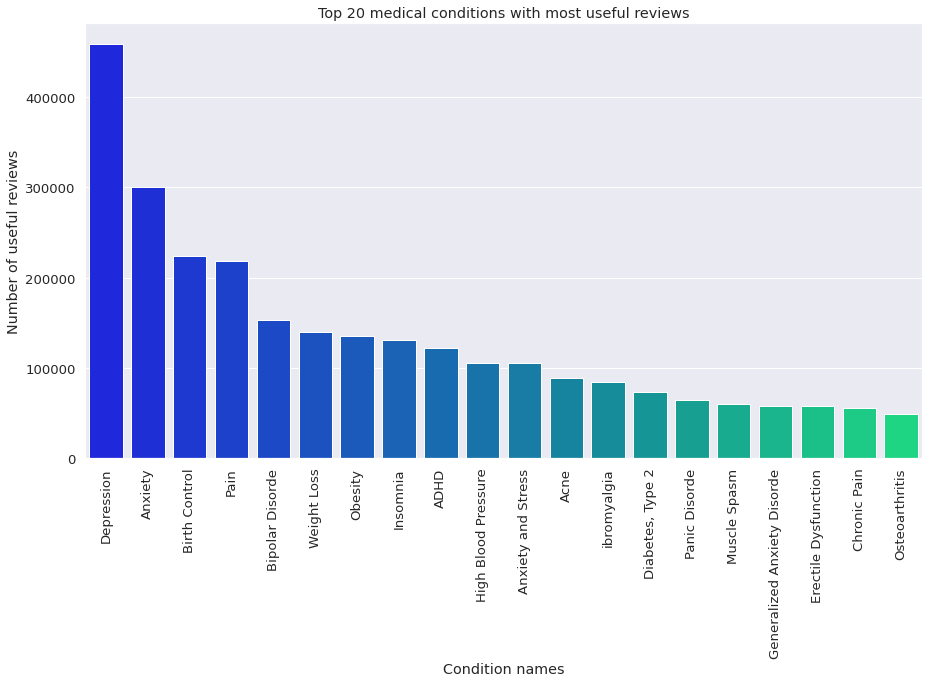

In [5]:
# Exploring for which conditions are these reviews more useful than others (top 20)
cols = ['condition', 'usefulCount']

df_useful = data[cols].groupby(by=["condition"]).sum().sort_values(by='usefulCount', ascending = False).reset_index().head(20)


usefulCount = df_useful['usefulCount']
conditions = df_useful['condition']

title = 'Top 20 medical conditions with most useful reviews'
xlabel = 'Condition names'
ylabel = 'Number of useful reviews'
bar_plot(conditions, usefulCount, 'winter', title, ylabel, xlabel)

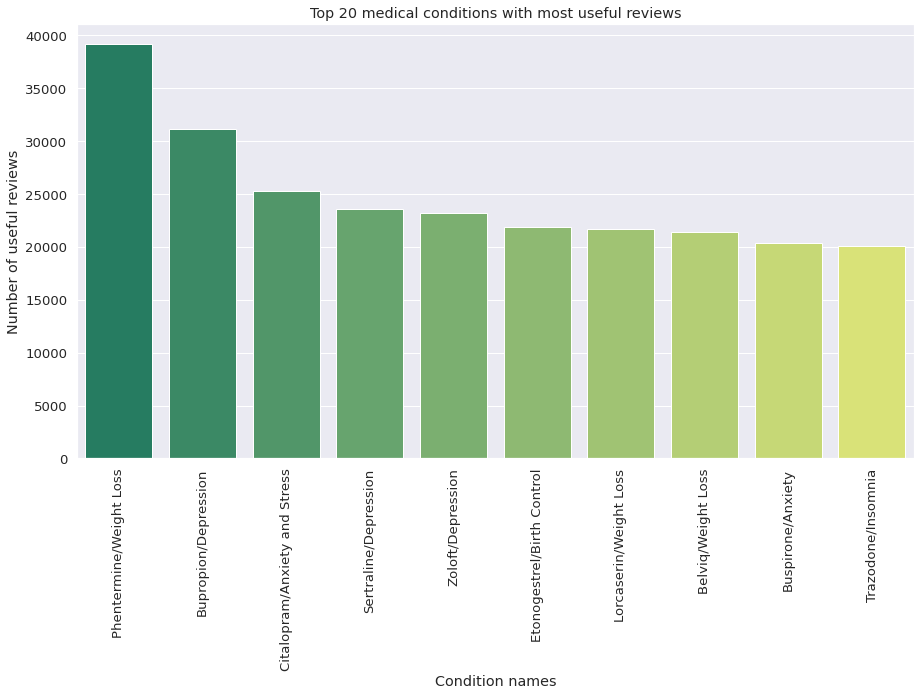

In [6]:
# Exploring which medications and for which conditions are these reviews more useful than others (top 10)
cols = ['condition', 'drugName', 'usefulCount']

df_useful_meds = data[cols].groupby(by=["drugName", "condition"]).sum().sort_values(by='usefulCount', ascending = False).reset_index().head(10)

df_useful_meds

usefulCount = df_useful_meds['usefulCount']
conditions = df_useful_meds['condition']
drugNames = df_useful_meds['drugName']

labels = [drugNames[i] + '/' + conditions[i] for i in range(10)]

title = 'Top 20 medical conditions with most useful reviews'
xlabel = 'Condition names'
ylabel = 'Number of useful reviews'
bar_plot(labels, usefulCount, 'summer', title, ylabel, xlabel)